<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Statistics (a)

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
# import warnings; warnings.simplefilter('ignore')

## Normality Tests

### Benchmark Case

In [2]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [64]:
a = np.arange(12)
b = a.reshape(4,3)
b

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [5]:
b[0:-1]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
s = np.random.standard_normal(8000)
s

array([-0.8044583 ,  0.32093155, -0.02548288, ...,  0.49679669,
        0.30105573, -1.72963372])

In [8]:
x = np.linspace(0.05,0.2,50)
x

array([0.05      , 0.05306122, 0.05612245, 0.05918367, 0.0622449 ,
       0.06530612, 0.06836735, 0.07142857, 0.0744898 , 0.07755102,
       0.08061224, 0.08367347, 0.08673469, 0.08979592, 0.09285714,
       0.09591837, 0.09897959, 0.10204082, 0.10510204, 0.10816327,
       0.11122449, 0.11428571, 0.11734694, 0.12040816, 0.12346939,
       0.12653061, 0.12959184, 0.13265306, 0.13571429, 0.13877551,
       0.14183673, 0.14489796, 0.14795918, 0.15102041, 0.15408163,
       0.15714286, 0.16020408, 0.16326531, 0.16632653, 0.16938776,
       0.17244898, 0.1755102 , 0.17857143, 0.18163265, 0.18469388,
       0.1877551 , 0.19081633, 0.19387755, 0.19693878, 0.2       ])

In [9]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [10]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [11]:
paths[:-1]

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [ 99.87358301, 100.32899581, 101.42645641, ...,  97.73005986,
         99.35677478,  98.43276784],
       [102.7965466 ,  96.20101688,  99.91628077, ...,  99.07144562,
        101.91123868,  94.88878076],
       ...,
       [137.06831156,  70.24934364, 107.09516001, ...,  96.76181168,
        110.5583919 , 109.63470713],
       [147.90445366,  69.77093238, 104.39214852, ...,  93.53487494,
        108.10796765, 109.94217898],
       [148.71044865,  70.33375286, 103.6991959 , ...,  91.5134454 ,
        105.51677586, 109.54098336]])

In [12]:
paths[1:]

array([[ 99.87358301, 100.32899581, 101.42645641, ...,  97.73005986,
         99.35677478,  98.43276784],
       [102.7965466 ,  96.20101688,  99.91628077, ...,  99.07144562,
        101.91123868,  94.88878076],
       [103.43054801,  97.18861192, 105.58655732, ...,  93.72473471,
        105.16758136,  90.99019993],
       ...,
       [147.90445366,  69.77093238, 104.39214852, ...,  93.53487494,
        108.10796765, 109.94217898],
       [148.71044865,  70.33375286, 103.6991959 , ...,  91.5134454 ,
        105.51677586, 109.54098336],
       [150.33265542,  77.30548032, 104.01600397, ...,  88.87257839,
        102.11988252, 110.96333682]])

Text(0, 0.5, 'index level')

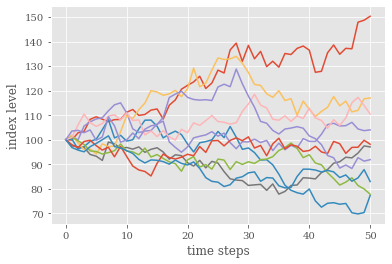

In [13]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')
# tag: normal_sim_1
# title: 10 simulated paths of geometric Brownian motion

In [14]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [15]:
np.log(2/1)

0.6931471805599453

In [16]:
paths[:, 0].round(4)

array([100.    ,  99.8736, 102.7965, 103.4305, 108.3078, 109.3635,
       108.3694, 107.4386, 108.1938, 108.256 , 111.1955, 112.3288,
       109.9248, 110.3037, 112.0828, 112.543 , 108.4417, 114.0643,
       116.2485, 120.5966, 122.1592, 123.5557, 125.8795, 120.888 ,
       123.1154, 128.3729, 127.2161, 136.593 , 139.3831, 131.9397,
       138.473 , 132.9862, 136.0242, 129.8096, 132.0028, 129.5842,
       135.1556, 134.7347, 137.2288, 138.1982, 136.5289, 127.4813,
       127.8945, 135.4301, 138.626 , 134.8424, 137.2569, 137.0683,
       147.9045, 148.7104, 150.3327])

In [17]:
log_returns[:, 0].round(4)

array([-0.0013,  0.0288,  0.0061,  0.0461,  0.0097, -0.0091, -0.0086,
        0.007 ,  0.0006,  0.0268,  0.0101, -0.0216,  0.0034,  0.016 ,
        0.0041, -0.0371,  0.0505,  0.019 ,  0.0367,  0.0129,  0.0114,
        0.0186, -0.0405,  0.0183,  0.0418, -0.0091,  0.0711,  0.0202,
       -0.0549,  0.0483, -0.0404,  0.0226, -0.0468,  0.0168, -0.0185,
        0.0421, -0.0031,  0.0183,  0.007 , -0.0122, -0.0686,  0.0032,
        0.0573,  0.0233, -0.0277,  0.0177, -0.0014,  0.0761,  0.0054,
        0.0108])

In [18]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print("%14s %15s" % ('statistic', 'value'))
    print(30 * "-")
    print("%14s %15.5f" % ('size', sta[0]))
    print("%14s %15.5f" % ('min', sta[1][0]))
    print("%14s %15.5f" % ('max', sta[1][1]))
    print("%14s %15.5f" % ('mean', sta[2]))
    print("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print("%14s %15.5f" % ('skew', sta[4]))
    print("%14s %15.5f" % ('kurtosis', sta[5]))

In [19]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15673
           max         0.15369
          mean         0.00060
           std         0.02828
          skew         0.00058
      kurtosis         0.00081


AttributeError: 'Rectangle' object has no property 'normed'

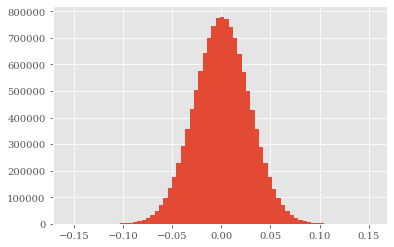

In [20]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_2
# title: Histogram of log-returns and normal density function

Text(0, 0.5, 'sample quantiles')

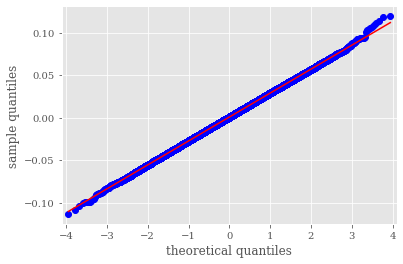

In [21]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_1
# title: Quantile-quantile plot for log returns

In [22]:
log_returns.flatten()[::2]

array([-0.00126497,  0.01416378,  0.01847206, ..., -0.01608221,
       -0.03516398, -0.03272251])

In [23]:
log_returns.flatten()

array([-0.00126497,  0.00328456,  0.01416378, ..., -0.02928227,
       -0.03272251,  0.01290109])

In [24]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])

In [25]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.400
Kurt of data set           0.001
Kurt test p-value          0.557
Norm test p-value          0.591


Text(0.5, 1.0, 'log data')

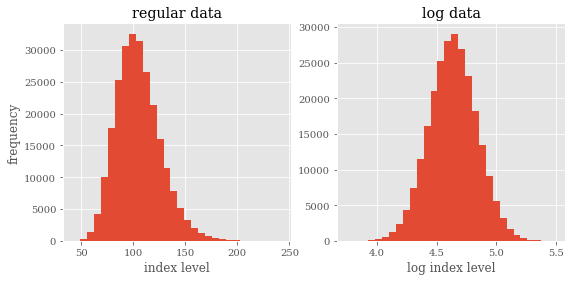

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')
# tag: normal_sim_3
# title: Histogram of simulated end-of-period index levels
# size: 90

In [27]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74751
           max       242.01787
          mean       105.12690
           std        21.23412
          skew         0.61134
      kurtosis         0.65376


In [28]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75531
           max         5.48901
          mean         4.63517
           std         0.20000
          skew        -0.00096
      kurtosis        -0.00319


In [29]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.844
Kurt of data set          -0.003
Kurt test p-value          0.750
Norm test p-value          0.932


AttributeError: 'Rectangle' object has no property 'normed'

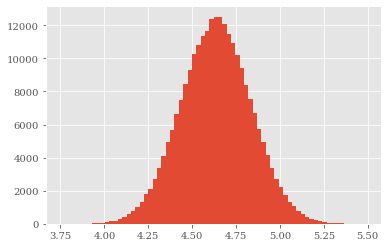

In [30]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()
# tag: normal_sim_4
# title: Histogram of log index levels and normal density function

In [ ]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: sim_val_qq_2
# title: Quantile-quantile plot for log index levels

### Real World Data

In [23]:
import pandas as pd

In [24]:
raw = pd.read_csv('source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [25]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [26]:
raw

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-25,156.410000,78.630,40.78,972.91,241.71,255.29,2557.15,11.23,1.1812,1277.01,22.83,121.35
2017-10-26,157.410000,78.760,41.35,972.43,241.72,255.62,2560.40,11.30,1.1650,1266.73,22.43,120.33
2017-10-27,163.050000,83.810,44.40,1100.95,241.71,257.71,2581.07,9.80,1.1608,1272.60,22.57,120.90


In [27]:
data = raw[symbols]
data = data.dropna()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


In [29]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


In [30]:
data.iloc[0]

SPY       113.330000
GLD       109.800000
AAPL.O     30.572827
MSFT.O     30.950000
Name: 2010-01-04 00:00:00, dtype: float64

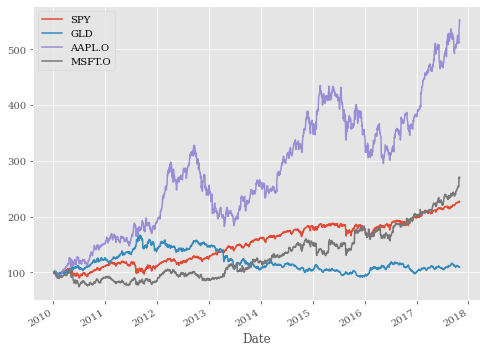

In [31]:
(data / data.iloc[0] * 100).plot(figsize=(8, 6), grid=True)
# tag: real_returns_1
# title: Evolution of stock and index levels over time

In [32]:
data.shift(1)

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,113.33,109.80,30.572827,30.950
2010-01-06,113.63,109.70,30.625684,30.960
2010-01-07,113.71,111.51,30.138541,30.770
2010-01-08,114.19,110.82,30.082827,30.452
...,...,...,...,...
2017-10-25,256.56,121.33,157.100000,78.860
2017-10-26,255.29,121.35,156.410000,78.630
2017-10-27,255.62,120.33,157.410000,78.760


In [33]:
log_returns = np.log(data / data.shift(1)) # ln(FV/PV)
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76f8356c50>,
      dtype=object)

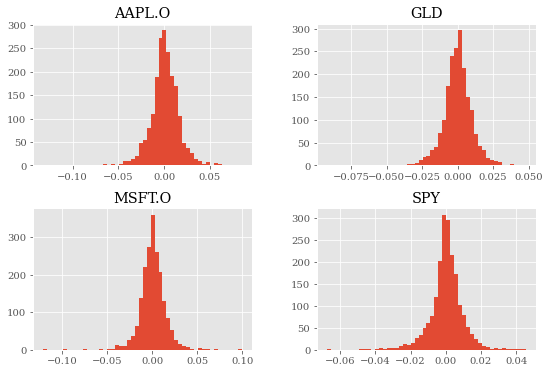

In [34]:
log_returns.hist(bins=50, figsize=(9, 6))
# tag: real_returns_2
# title: Histogram of respective log-returns
# size: 90

In [35]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------


NameError: name 'print_statistics' is not defined

In [ ]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_1
# title: Quantile-quantile plot for S&P 500 log returns

In [ ]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
# tag: real_val_qq_2
# title: Quantile-quantile plot for Microsoft log returns

In [ ]:
for sym in symbols:
    print("\nResults for symbol %s" % sym)
    print(32 * "-")
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)

## Portfolio Optimization

### The Data

In [65]:
symbols = ['AAPL.O', 'MSFT.O', 'AMZN.O', 'GDX', 'GLD']
noa = len(symbols)

In [66]:
data = raw[symbols]

In [67]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)
# tag: portfolio_1
# title: Stock prices over time
# size: 90

AttributeError: 'DataFrame' object has no attribute 'ix'

In [68]:
rets = np.log(data / data.shift(1))

In [69]:
rets.mean()

AAPL.O    0.000868
MSFT.O    0.000502
AMZN.O    0.001071
GDX      -0.000382
GLD       0.000048
dtype: float64

In [70]:
rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
AMZN.O    0.269869
GDX      -0.096212
GLD       0.012069
dtype: float64

In [71]:
rets.cov() * 252

,AAPL.O,MSFT.O,AMZN.O,GDX,GLD
AAPL.O,0.064899,0.022504,0.026932,0.014669,0.001510
MSFT.O,0.022504,0.050234,0.029146,0.010995,-0.000426
AMZN.O,0.026932,0.029146,0.097792,0.009917,-0.001584
GDX,0.014669,0.010995,0.009917,0.150716,0.048760
GLD,0.001510,-0.000426,-0.001584,0.048760,0.027666


### The Basic Theory

In [72]:
weights = np.random.random(noa) # 要素数 noa の、0.0以上、1.0未満の floats 
weights /= np.sum(weights) # weights の合計が1になるようにする

In [73]:
weights

array([0.11161951, 0.07963988, 0.20142623, 0.26400007, 0.34331432])

In [74]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

0.06757253949538139

In [75]:
np.dot(rets.cov() * 252, weights)

array([0.01885211, 0.01513976, 0.02709904, 0.06103976, 0.0221863 ])

In [76]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

0.032499824181753324

In [77]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

0.18027707614046032

In [78]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

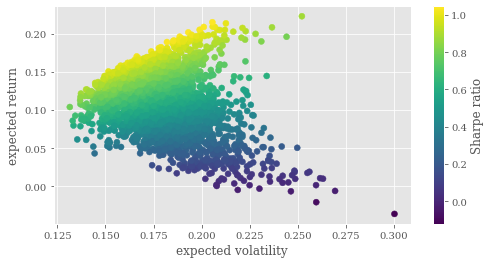

In [79]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_2
# title: Expected return and volatility for different/random portfolio weights
# size: 90

### Portfolio Optimizations

In [80]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [81]:
import scipy.optimize as sco

In [82]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [83]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [84]:
bnds = tuple((0, 1) for x in range(noa))

In [85]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [86]:
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [87]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

CPU times: user 141 ms, sys: 31.2 ms, total: 172 ms
Wall time: 145 ms


In [110]:
opts

     fun: -1.0556617020585946
     jac: array([ 4.79370356e-05, -6.97374344e-05,  5.30630350e-05,  8.51281404e-01,
       -4.90382314e-04])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([4.74033017e-01, 5.03590077e-02, 3.93814802e-01, 6.63531730e-17,
       8.17931727e-02])

In [111]:
opts['x'].round(3)

array([0.474, 0.05 , 0.394, 0.   , 0.082])

In [112]:
# 返り値は左からリターン、ボラティリティ、Sharpe Ratio
statistics(opts['x']).round(3)

array([0.217, 0.206, 1.056])

In [113]:
# 次はボラティリティを最小化することを考える
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [114]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [115]:
optv

     fun: 0.050877132017220356
     jac: array([0.09325334, 0.05187131, 0.11624132, 0.02545848, 0.00057416])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.52643344, 0.02386919, 0.44235773, 0.        , 0.00733964])

In [116]:
# 構成比0%になったのは GDX(金鉱株ETF)。GLD(金ETF)よりもボラティリティが高い傾向にある
optv['x'].round(3)

array([0.526, 0.024, 0.442, 0.   , 0.007])

In [118]:
# 返り値は左からリターン、ボラティリティ、Sharpe Ratio
statistics(optv['x']).round(3)

array([0.238, 0.226, 1.053])

### Efficient Frontier

In [119]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, # Efficient Frontier では各繰り返しにおいて異なる target return に固定して、volatility を最小化する。これはそのための条件
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [120]:
def min_func_port(weights):
    return statistics(weights)[1]

In [121]:
%%time
trets = np.linspace(0.0, 0.25, 50) # 各繰り返しにおけるtarget returnの配列 
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 14.4 s, sys: 109 ms, total: 14.5 s
Wall time: 15.5 s


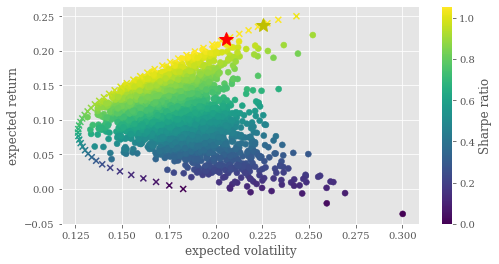

In [122]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_3
# title: Minimum risk portfolios for given return level (crosses)
# size: 90

### Capital Market Line

In [99]:
import scipy.interpolate as sci

In [100]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [101]:
tck = sci.splrep(evols, erets)

In [102]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [103]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [104]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [105]:
opt

array([0.01      , 1.0090905 , 0.22552992])

In [106]:
np.round(equations(opt), 6)

array([ 0., -0., -0.])

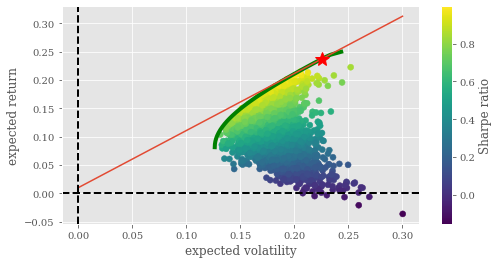

In [107]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

In [108]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [109]:
res['x'].round(3)

array([0.525, 0.025, 0.443, 0.   , 0.007])

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>